<a href="https://colab.research.google.com/github/AmritSDutta/colab_ml/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd                      # For data manipulation
import matplotlib.pyplot as plt          # For plotting

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [65]:
def plot_data_with_time(data, title, xlabel, ylabel, grid=True):
    plt.figure(figsize=(12, 6))
    plt.plot(data, color='tab:orange')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.autoscale(axis='x', tight=True)
    plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
    plt.show()

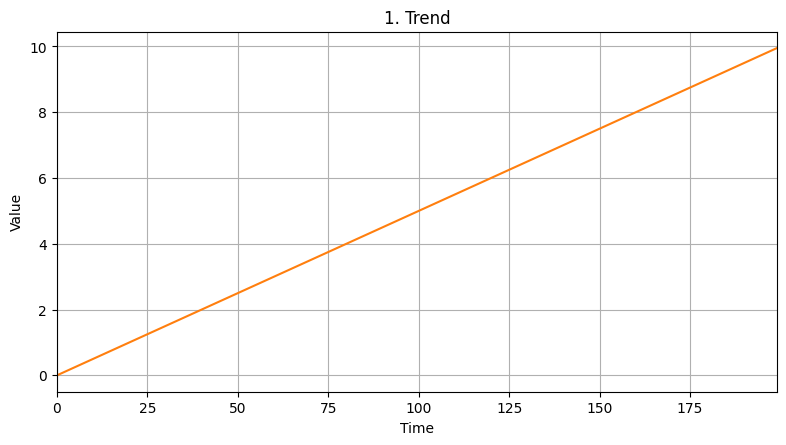

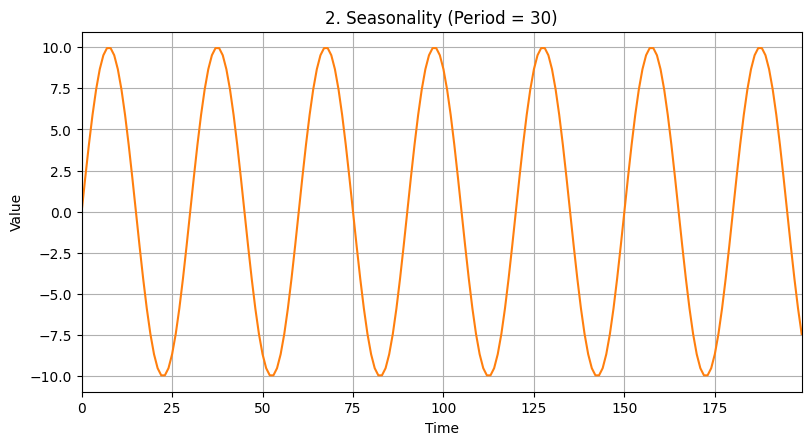

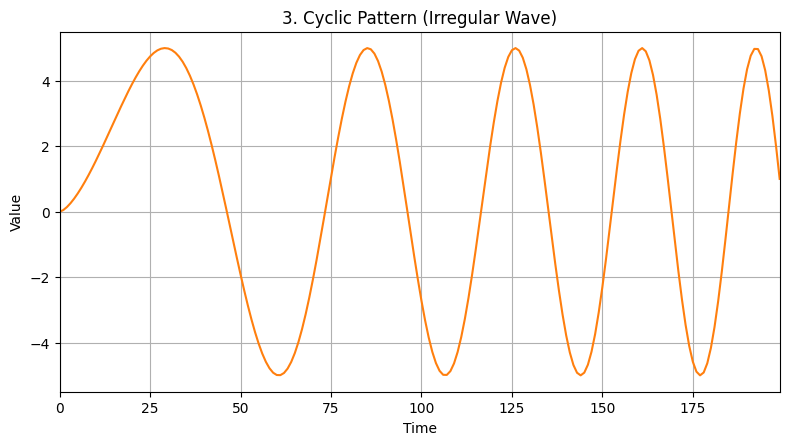

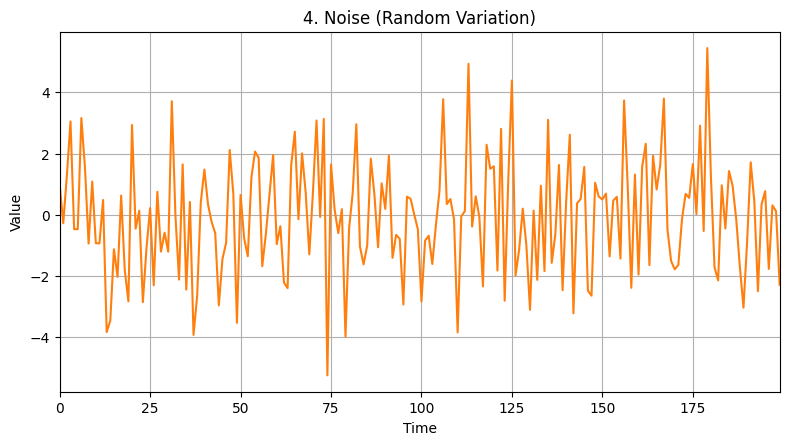

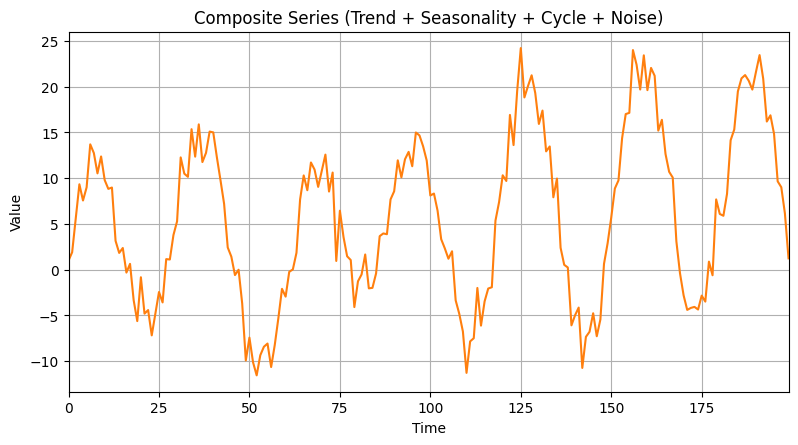

ADF Statistic: -2.4593174858921003
p-value: 0.12568912245757508
Stationary? No


In [66]:
# Set seed for reproducibility
np.random.seed(42)
t = np.arange(0, 200)

# 1. Trend Component
trend = 0.05 * t
plot_data_with_time(trend, "1. Trend", "Time", "Value", True)

# 2. Seasonality Component
seasonality = 10 * np.sin(2 * np.pi * t / 30)
plot_data_with_time(seasonality, "2. Seasonality (Period = 30)", "Time", "Value", True)


# 3. Cyclic Pattern (less regular than seasonality)
cycle = 5 * np.sin(0.01 * t ** 1.5)
plot_data_with_time(cycle, "3. Cyclic Pattern (Irregular Wave)", "Time", "Value", True)


# 4. Noise Component
noise = np.random.normal(0, 2, len(t))
plot_data_with_time(noise, "4. Noise (Random Variation)", "Time", "Value", True)


# Combine all components into a composite time series
composite = trend + seasonality + cycle + noise
plot_data_with_time(composite, "Composite Series (Trend + Seasonality + Cycle + Noise)", "Time", "Value", True)

# Check Stationarity using ADF Test
result = adfuller(composite)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Stationary?" , "Yes" if result[1] < 0.05 else "No")

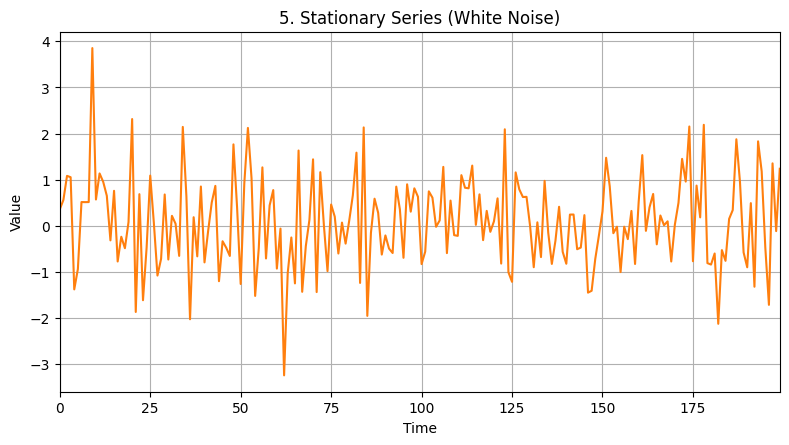

ADF Statistic: -14.719231601116302
p-value: 2.76870465070279e-27
Stationary? Yes


In [67]:
# 5. Stationarity: Create a stationary series (white noise)
stationary = np.random.normal(0, 1, len(t))
plot_data_with_time(stationary, "5. Stationary Series (White Noise)", "Time", "Value", True)


# Check Stationarity using ADF Test
result = adfuller(stationary)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Stationary?" , "Yes" if result[1] < 0.05 else "No")

In [80]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)                    # Load dataset from online source
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


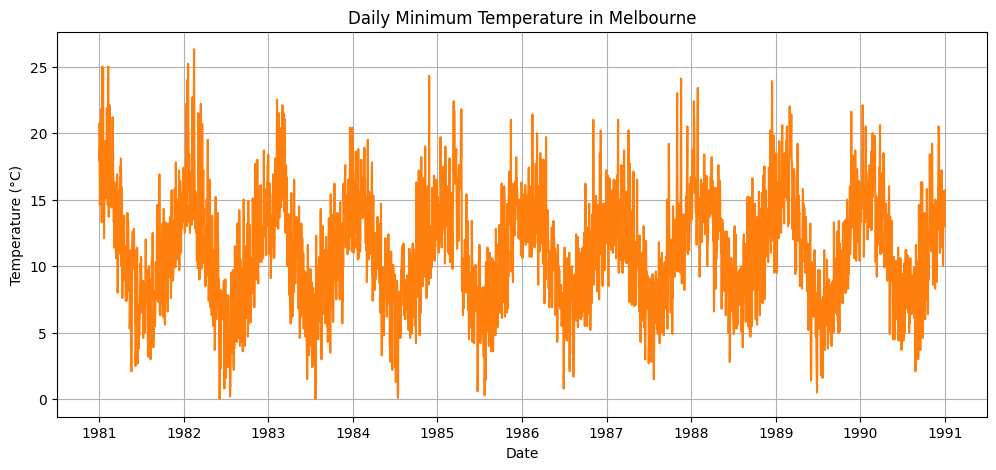

In [81]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 6: Plot the time series
plt.figure(figsize=(12, 5))
plt.plot(df['Temp'], color='tab:orange')   # Line plot of temperature over time
plt.title("Daily Minimum Temperature in Melbourne")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


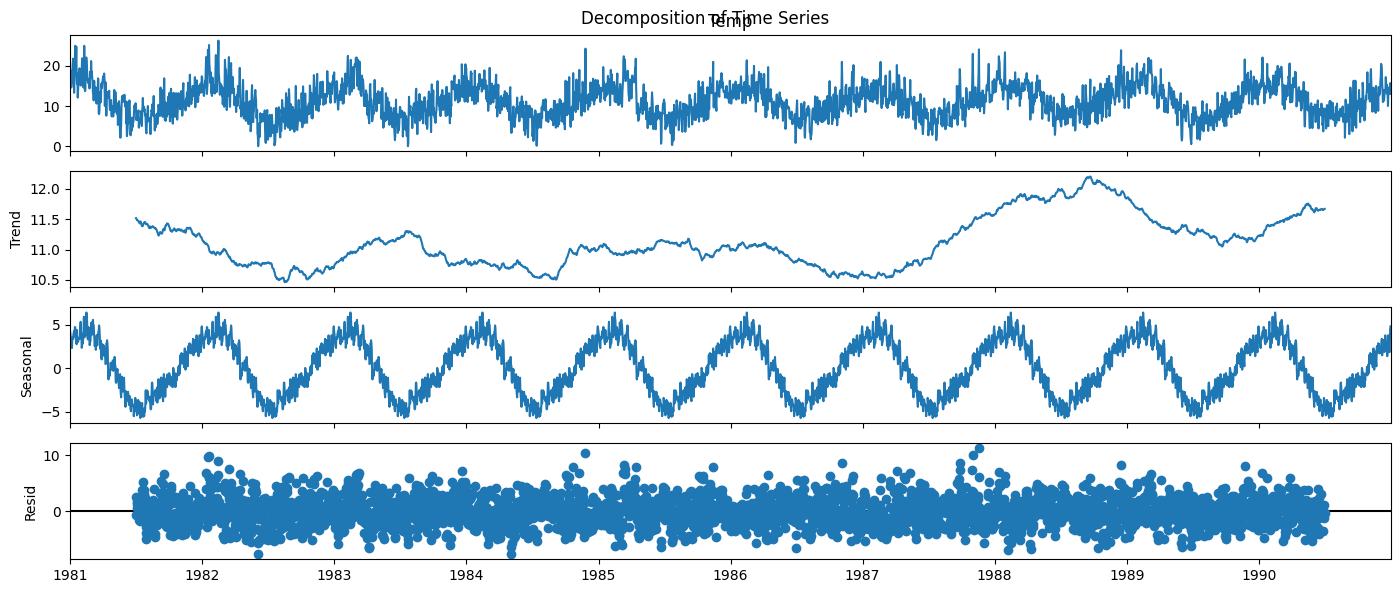

In [82]:
# Step 1: Import the seasonal_decompose tool
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 2: Apply decomposition (additive model)
result = seasonal_decompose(df['Temp'], model='additive', period=365)  # 365 = daily data with yearly cycle

# Step 3: Plot each component
plt.rcParams.update({'figure.figsize': (14, 6)})
result.plot()
plt.suptitle("Decomposition of Time Series", fontsize=12)
plt.show()


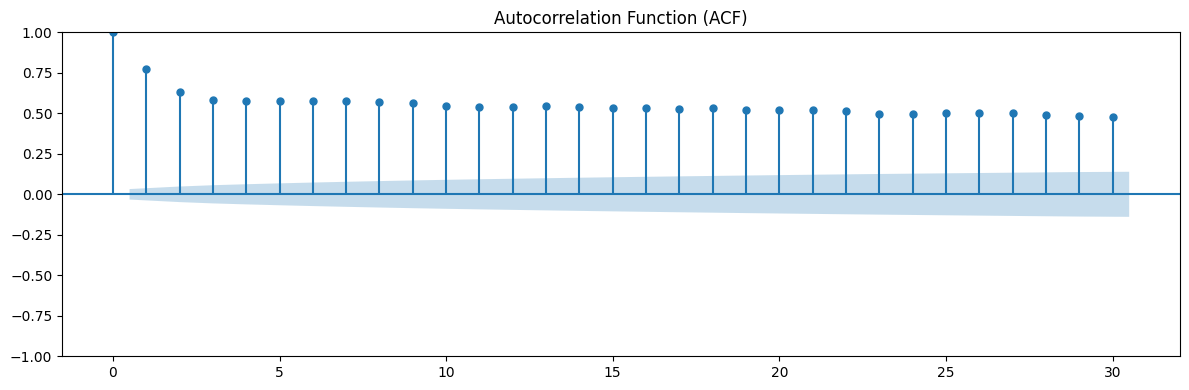

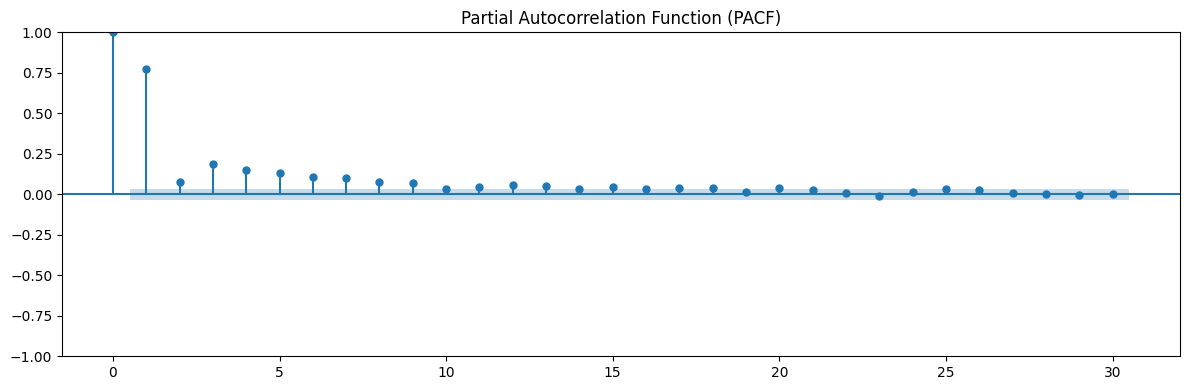

In [83]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Step 7: ACF and PACF Plots
plt.figure(figsize=(12, 4))
plot_acf(df['Temp'], lags=30, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(df['Temp'], lags=30, method='ywm', ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d69j_8w/hhtxyohx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d69j_8w/j0tq5e2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44248', 'data', 'file=/tmp/tmp1d69j_8w/hhtxyohx.json', 'init=/tmp/tmp1d69j_8w/j0tq5e2_.json', 'output', 'file=/tmp/tmp1d69j_8w/prophet_modeln77vfos9/prophet_model-20250427191529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:15:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:15:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


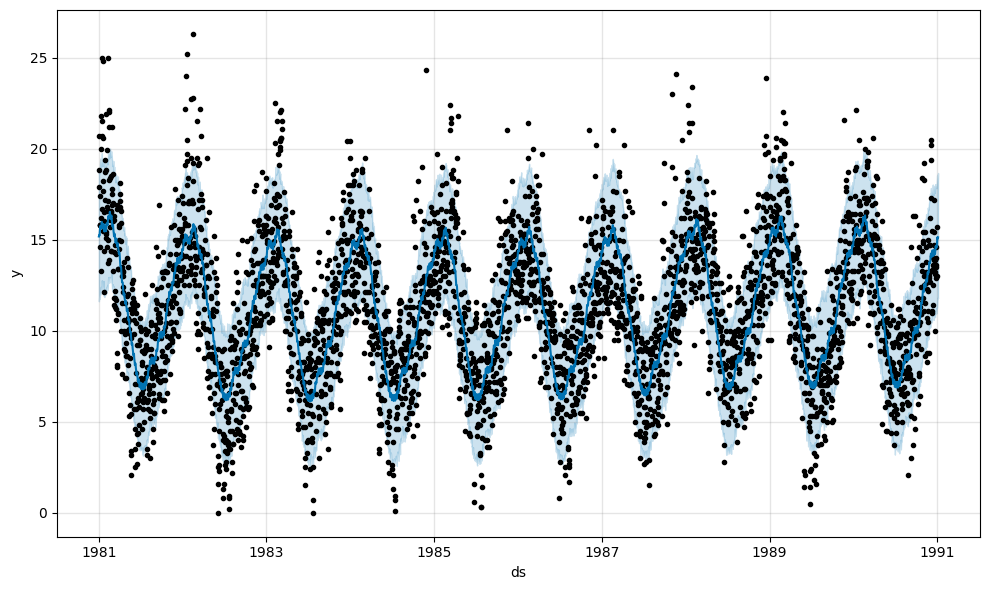

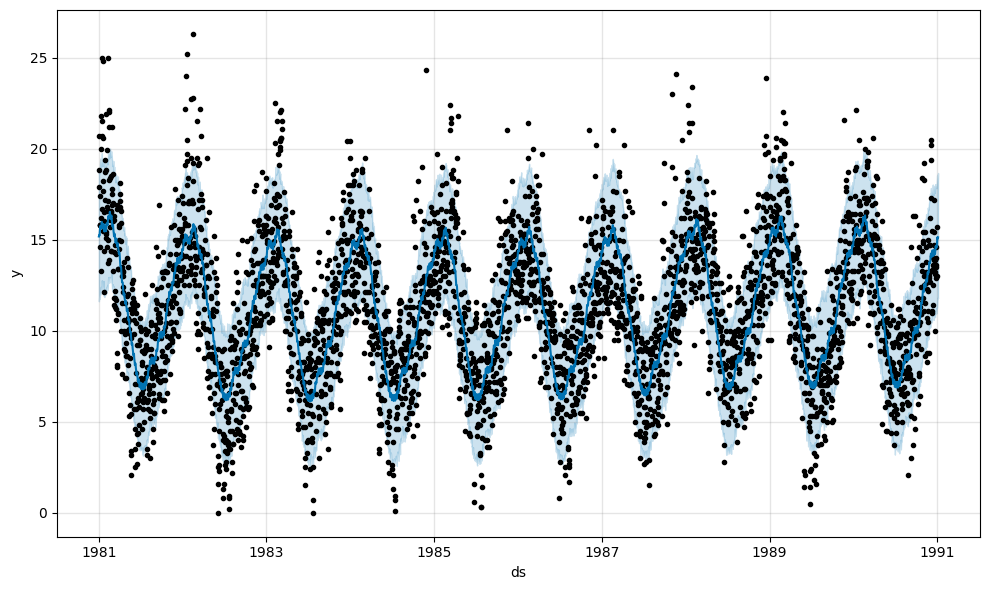

In [84]:
from prophet import Prophet

df_for_prophet = df.copy()
df_for_prophet.reset_index(inplace=True)
df_for_prophet.columns = ['ds', 'y']

# Create and fit model
model = Prophet()
model.fit(df_for_prophet)

# Create future dataframe
future = model.make_future_dataframe(periods=5)

# Forecast
forecast = model.predict(future)

# Plot
model.plot(forecast)

In [73]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Same minimal data
df = pd.DataFrame({
    'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'y': [1, 2, 3, 4, 5, 4, 3, 4, 5, 6]
})

# Prepare the data for LSTM
data = df['y'].values
X, y = [], []
for i in range(len(data) - 1):
    X.append([data[i]])
    y.append(data[i + 1])
X = np.array(X)
y = np.array(y)

# Reshape X for LSTM: (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, 1))

# Build model
model = Sequential([
    LSTM(12, input_shape=(1, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X, y, epochs=100, verbose=1)

# Predict next value
last_value = np.array([[data[-1]]]).reshape((1, 1, 1))
predicted = model.predict(last_value)
print(f"Next predicted value: {predicted[0,0]}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 17.3572
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 17.3142
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 17.2712
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 17.2283
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 17.1855
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 17.1427
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 17.1001
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 17.0574
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 17.0147
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 16.9721
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 16.9294
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 16.8866
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 16.8439
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 16.8010
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 16.7581
Epoch 16/10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Next predicted value: 0.9027714729309082


**Multivariate example**

In [74]:
# Create sample multivariate data
multi_df = pd.DataFrame({
    'ds': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'y': [1, 2, 3, 4, 5, 4, 3, 4, 5, 6],
    'feature1': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    'feature2': [5, 4, 3, 2, 1, 2, 3, 4, 5, 6]
})

multi_df.columns

Index(['ds', 'y', 'feature1', 'feature2'], dtype='object')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d69j_8w/2jms7pmk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1d69j_8w/2383hzd_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83147', 'data', 'file=/tmp/tmp1d69j_8w/2jms7pmk.json', 'init=/tmp/tmp1d69j_8w/2383hzd_.json', 'output', 'file=/tmp/tmp1d69j_8w/prophet_modelqvywhcsf/prophet_model-20250427191408.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:14:08 - cmdstanpy - INFO - Chain [1] start processing
IN

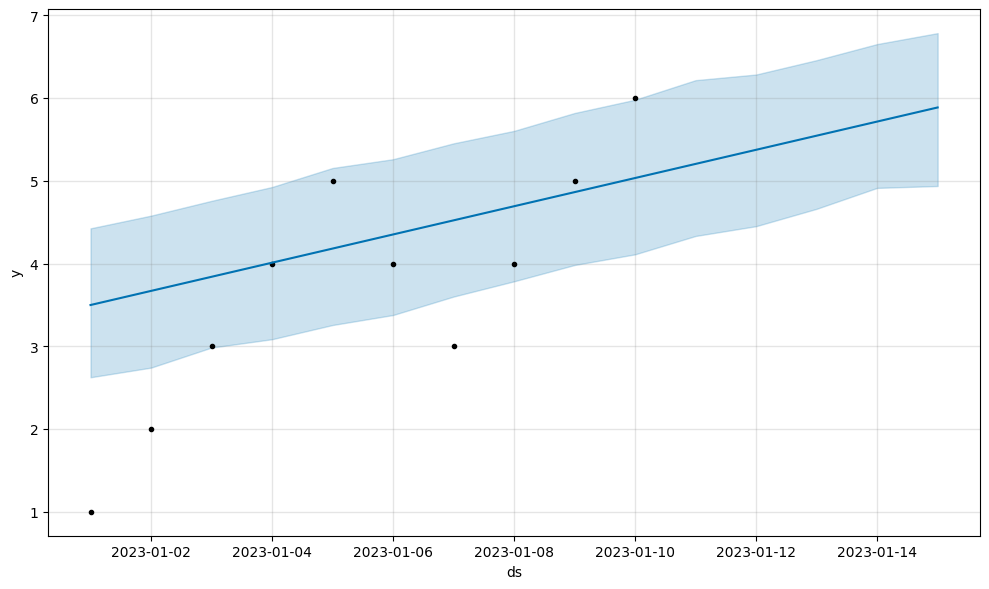

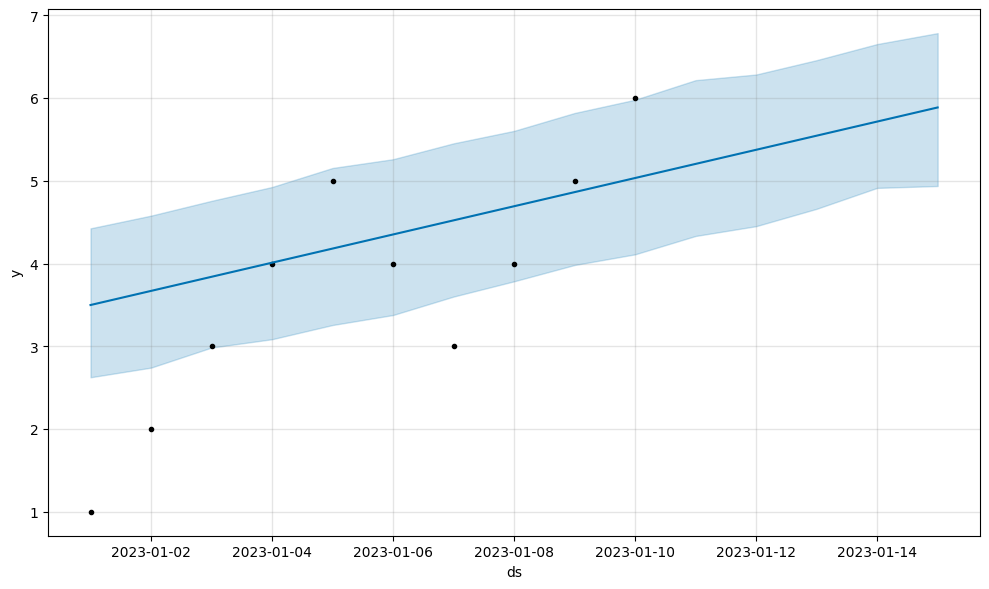

In [75]:
multi_df_for_prophet = multi_df.copy()
multi_df_for_prophet.reset_index(inplace=True)


# Create and fit model
model = Prophet()
model.add_regressor('feature1')
model.add_regressor('feature2')
model.fit(multi_df_for_prophet)

# Create future dataframe
future = model.make_future_dataframe(periods=5)
# Add future feature values (fake simple extension)
future['feature1'] = multi_df_for_prophet['feature1'].iloc[-1]
future['feature2'] = multi_df_for_prophet['feature2'].iloc[-1]

# Forecast
forecast = model.predict(future)

# Plot
model.plot(forecast)

In [76]:
# Prepare X (features) and y (target)
features = ['feature1', 'feature2']
X, y = [], []
data = multi_df[features + ['y']].values

for i in range(len(data) - 1):
    X.append(data[i, :-1])  # features only
    y.append(data[i + 1, -1])  # next time's y

X = np.array(X)
y = np.array(y)

# Reshape X for LSTM: (samples, timesteps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Build model
model = Sequential([
    LSTM(10, input_shape=(1, X.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X, y, epochs=100, verbose=1)

# Prepare latest features
last_features = multi_df[features].iloc[-1].values.astype(np.float32)
last_features = last_features.reshape((1, 1, len(features)))  # (batch_size, timesteps, features)

# Predict
predicted = model.predict(last_features, verbose=0)
print(f"Next predicted y: {predicted[0,0]}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 15.0059
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 14.9608
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 14.9159
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 14.8711
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 14.8265
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 14.7821
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 14.7378
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 14.6938
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 14.6498
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 14.6061
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 14.5626
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 14.5192
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 14.4760
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 14.4330
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 14.3902
Epoch 16/100
1/1 ━

Next predicted y: 0.8782988786697388
